Image classification pipeline involves 
1. fetching the image
2. Identifying train test and validation data
3. Model building, training, validating, hyperparameter tuning  and testing
4. Finally to evaluate model in terms of accuracy performed on tets set


In [1]:
# importig libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

The data set is in hdf5 format and can be fetched using h4oy library

In [45]:
# reading the data from hdf5
import h5py
filename = 'SVHN_single_grey1.h5'
f = h5py.File(filename, 'r+')

# List all groups
print("Keys: %s" % f.keys())


Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


The dataset is marked as train test and validation data
The values are changed to numpy array
The data consists of Street View House Numbering 
The task is to classify the digits from the images

In [137]:
# Getting the data and viewing the shape of the data
list(f.keys())
X1 = f['X_train']
y1=f['y_train']
X2 = f['X_test']
y2=f['y_test']
X3 = f['X_val']
y3=f['y_val']
X_train= np.array(X1.value)
y_train= np.array(y1.value)
X_test= np.array(X2.value)
y_test= np.array(y2.value)
X_val= np.array(X3.value)
y_val= np.array(y3.value)
print ('Training Test and Val dataset:',X_train.shape,X_test.shape,X_val.shape)
print ('Training Test and Val labels:',y_train.shape,y_test.shape,y_val.shape)

C:\NISHANT\Conda\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Training Test and Val dataset: (42000, 32, 32) (18000, 32, 32) (60000, 32, 32)
Training Test and Val labels: (42000,) (18000,) (60000,)


As seen above each of the image is of size 32*32 pixel with 42K train , 18K Test, 60K validation images

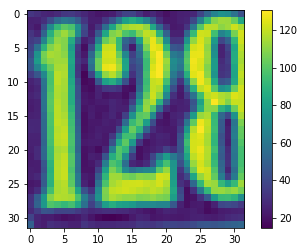

In [4]:
# to plot the first figure
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()
# As the pixel are ranging from 0 to 130 it has to scale down between 0 and 1

In [5]:
# Normalising the pixel values ranging between 0 and 255
X_train= X_train / 255

X_test= X_test / 255

X_val= X_val / 255


In [7]:
# converting labels from 1 to 9 and 10 for 0
Label = [y_train,y_test,y_val]
for item in Label:
    print(item,item.shape[0])
    for j in range(0,item.shape[0]):
        #print((item.shape[0]))
        if item[j] == 0:
            item[j]=10
        #j = j+1


[ 2  6  7 ...  7 10  4] 42000
[1 7 2 ... 7 9 2] 18000
[10 10 10 ...  9  9  9] 60000


In [52]:
# Flattening of the image in one D aray
train_features = X_train.reshape(42000, 1024)
print (train_features.shape)
test_features = X_test.reshape(18000, 1024)
print (test_features.shape)
val_features = X_val.reshape(60000, 1024)
print (val_features.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)


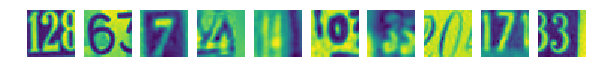

label for each of the above image: [ 2  6  7  4  4 10  3 10  7  3]


In [14]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_features[i].reshape(32, 32))
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [15]:
# performing KNN using tensorflow 
k = 10

# place holder for the input values or neurons
x = tf.placeholder(X_train.dtype,X_train.shape)
#v = tf.placeholder(X_val.dtype,X_val.shape)

# place holder for the test input values i.e image of size 32 x 32 
y = tf.placeholder(X_test.dtype,X_test.shape[1:])

# Clipping the value between 0 min and 1 max for the input and the test data
xThresh = tf.clip_by_value(tf.cast(x,tf.int32),0,1)

yThresh = tf.clip_by_value(tf.cast(y,tf.int32),0,1)

# Computing L0 Norm by reducing along axes
Dist = tf.count_nonzero(xThresh - yThresh,axis=[1,2]) 

# sorting (image) indices in order of ascending metrics, pick first k in the next step

Nearest_img = tf.contrib.framework.argsort(Dist, direction='ASCENDING') 
# doing trLabels[KClosestTrImages[0:paramk]] throws error, hence this workaround
Nearest_label = tf.gather(y_train,Nearest_img[0:k]) 

# examine labels of k closest Train images
Labels, Idx, Counts = tf.unique_with_counts(Nearest_label) 

# assign label to test image based on most occurring labels among k closest Train images
PredictedLabel = tf.gather(Labels, tf.argmax(Counts)) 

# Let's run the graph
numErrs = 0
numTestImages = np.shape(X_test)[0]
numTrainImages = np.shape(X_train)[0] # so many train images

with tf.Session() as sess:
  for i in range(0,100): # iterate each image in test set
    predictedLabel = sess.run([PredictedLabel], feed_dict={x:X_train, y:X_test[i]})   

    if predictedLabel == y_test[i]:
      numErrs += 1
 
print("# Classification Errors= ", numErrs, "% accuracy= ", 100.*(numTestImages-numErrs)/numTestImages)

Instructions for updating:
reduction_indices is deprecated, use axis instead
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

# Classification Errors=  7 % accuracy=  99.96111111111111


In [100]:
# Classification Errors=  383 % accuracy=  97.87222222222222 what we got with 1000 test images 
# As it takes time i restricted the count to 1000 only 

In [39]:
# implentng KNN using numpy


class NearestNeighbor(object):
  def __init__(self):
    pass

  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.Xtr = X
    self.ytr = y

  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X[:100].shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    # loop over all test rows
    for i in range(num_test):
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
      min_index = np.argmin(distances) # get the index with smallest distance
      Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

    return Ypred

In [17]:
nn = NearestNeighbor() # create a Nearest Neighbor classifier class
nn.train(train_features, y_train) # train the classifier on the training images and labels


In [142]:
y_predict = nn.predict(test_features) # predict labels on the test images
# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
count = 0
for i in range(len(y_predict)):
    
    if y_predict[i] == y_test[i]:
        count += 1
print ('accuracy: %f' % (count /len(y_predict)  ))


accuracy: 0.400000


Classification metric report




In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test[:100]))
from sklearn.metrics import accuracy_score
print('accuracy: %f'%accuracy_score(y_predict,y_test[:100]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.62      0.45      0.53        11
           2       0.50      0.67      0.57         9
           3       0.25      0.29      0.27         7
           4       0.50      0.67      0.57         9
           5       0.27      0.30      0.29        10
           6       0.43      0.21      0.29        14
           7       0.86      0.86      0.86         7
           8       0.43      0.46      0.44        13
           9       0.21      0.43      0.29         7
          10       0.00      0.00      0.00        13

   micro avg       0.40      0.40      0.40       100
   macro avg       0.37      0.39      0.37       100
weighted avg       0.39      0.40      0.39       100

accuracy: 0.400000


C:\NISHANT\Conda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\NISHANT\Conda\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Implementation Using keras

In [147]:
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation
from keras import optimizers

y_train = f['y_train']
y_test = f['y_test']
yOneHot = np.zeros([y_train.shape[0],10])
for i in range(y_train.shape[0]):
    yOneHot[i,y_train[i].astype(int)]=1

y_tr = yOneHot
yOneHot = np.zeros([y_test.shape[0],10])
for i in range(y_test.shape[0]):
    yOneHot[i,y_test[i].astype(int)]=1

y_tst = yOneHot
model = Sequential()
model.add(Dense(50, input_shape = (1024, )))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_features, y_tr, batch_size = 200, epochs = 50, verbose = 1)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 50)                51250     
_________________________________________________________________
activation_146 (Activation)  (None, 50)                0         
_________________________________________________________________
dense_118 (Dense)            (None, 50)                2550      
_________________________________________________________________
activation_147 (Activation)  (None, 50)                0         
_________________________________________________________________
dense_119 (Dense)            (None, 50)                2550      
_________________________________________________________________
activation_148 (Activation)  (None, 50)                0         
_________________________________________________________________
dense_120 (Dense)            (None, 50)              

In [76]:
results = model.evaluate(test_features[:1000], y_tst[:1000])

1000/1000 [==============================] - 0s 288us/step


In [80]:
print('Test accuracy: ', results[1])

Test accuracy:  0.68


# Initializing NN using keras


In [128]:

from keras.optimizers import SGD, Adadelta, Adagrad
from keras.models import Sequential
from keras.layers import Dense,Flatten
y_train = f['y_train']
y_test = f['y_test']
yOneHot = np.zeros([y_train.shape[0],10])
for i in range(y_train.shape[0]):
    yOneHot[i,y_train[i].astype(int)]=1

y_tr = yOneHot
yOneHot = np.zeros([y_test.shape[0],10])
for i in range(y_test.shape[0]):
    yOneHot[i,y_test[i].astype(int)]=1

y_tst = yOneHot
classifier = Sequential()

classifier.add(Dense(activation='relu',input_shape=(1024,),units=32,kernel_initializer='uniform'))
classifier.add(Dense(32,activation='relu',kernel_initializer='uniform'))

classifier.add(Dense(10,activation='softmax',kernel_initializer='uniform'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
classifier.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

classifier.summary()
classifier.fit(train_features,y_tr,epochs=10,batch_size=64,shuffle='batch')


Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 32)                32800     
_________________________________________________________________
dense_107 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_108 (Dense)            (None, 10)                330       
Total params: 34,186
Trainable params: 34,186
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
42000/42000 [==============================] - 5s 131us/step - loss: 2.3028 - acc: 0.1020
Epoch 2/10
42000/42000 [==============================] - 2s 45us/step - loss: 2.3022 - acc: 0.1055
Epoch 3/10
42000/42000 [==============================] - 2s 46us/step - loss: 2.2711 - acc: 0.1337
Epoch 4/10
42000/42000 [==============================] - 2s 47us/step - loss:

In [148]:
pred = classifier.predict(test_features)

In [149]:
pred[:,0].shape

(18000,)

In [150]:
score = classifier.evaluate(test_features, y_tst, verbose=0)
print('loss:', score[0])
print('Test accuracy:', score[1])

loss: 1.152786428027683
Test accuracy: 0.6361111111111111


## WITH Batch Normalization

In [138]:

from keras.layers import Dense, Dropout, Activation, BatchNormalization,Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad
batch_size = 128
nb_classes = 10
nb_epoch = 20
model = Sequential()

model.add(Activation('relu'))
model.add(BatchNormalization())

#model.add(Activation('relu'))
#model.add(BatchNormalization())

#model.add(Dropout(0.25))

#model.add(Activation('relu'))
#model.add(BatchNormalization())

model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.25))

#model.add(BatchNormalization())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

model.fit(train_features,y_tr, batch_size=batch_size, epochs=20, verbose=1)
score = model.evaluate(test_features, y_tst, verbose=0)
print('loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/20
42000/42000 [==============================] - 18s 438us/step - loss: 2.3143 - acc: 0.2351
Epoch 2/20
42000/42000 [==============================] - 14s 343us/step - loss: 1.9006 - acc: 0.3526
Epoch 3/20
42000/42000 [==============================] - 14s 326us/step - loss: 1.7863 - acc: 0.3944
Epoch 4/20
42000/42000 [==============================] - 12s 285us/step - loss: 1.7048 - acc: 0.4281
Epoch 5/20
42000/42000 [==============================] - 13s 312us/step - loss: 1.6265 - acc: 0.4566
Epoch 6/20
42000/42000 [==============================] - 12s 281us/step - loss: 1.5589 - acc: 0.4778
Epoch 7/20
42000/42000 [==============================] - 11s 273us/step - loss: 1.4977 - acc: 0.5033
Epoch 8/20
42000/42000 [==============================] - 11s 257us/step - loss: 1.4362 - acc: 0.5244
Epoch 9/20
42000/42000 [==============================] - 11s 253us/step - loss: 1.3976 - acc: 0.5399
Epoch 10/20
42000/42000 [==============================] - 11s 262us/step - loss: 

# implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [154]:
N_FEATURES = 32 * 32
N_CLASSES = 10

In [171]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

In [241]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(z):
    sg = sigmoid(z)
    return sg * (1 - sg)
def L2_reg(lambda_, w1, w2):
    return (lambda_ / 2.0) * (np.sum(w1 ** 2) + np.sum(w2 ** 2))

def L1_reg(lambda_, w1, w2):
    return (lambda_ / 2.0) * (np.abs(w1).sum() + np.abs(w2).sum())
def cross_entropy(outputs, y_target):
    return -np.sum(np.log(outputs) * y_target, axis=1)
def mle(y, axis=1):
    return np.argmax(y, axis)
def relu(x):
    return np.max(x,0)
    

In [245]:
class NN:

    def __init__(self, n_classes, n_features, n_hidden_units=30,
                 l1=0.0, l2=0.0, epochs=500, learning_rate=0.01,
                 n_batches=1, random_seed=None):

        if random_seed:
            np.random.seed(random_seed)
        self.n_classes = n_classes
        self.n_features = n_features
        self.n_hidden_units = n_hidden_units
        self.w1, self.w2 = self._init_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.n_batches = n_batches

    def _init_weights(self):
        w1 = np.random.uniform(-1.0, 1.0, 
                               size=self.n_hidden_units * (self.n_features + 1))
        w1 = w1.reshape(self.n_hidden_units, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, 
                               size=self.n_classes * (self.n_hidden_units + 1))
        w2 = w2.reshape(self.n_classes, self.n_hidden_units + 1)
        return w1, w2

    def _add_bias_unit(self, X, how='column'):
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1] + 1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0] + 1, X.shape[1]))
            X_new[1:, :] = X
        return X_new

    def _forward(self, X):
        net_input = self._add_bias_unit(X, how='column')
        net_hidden = self.w1.dot(net_input.T)
        act_hidden = sigmoid(net_hidden)
        act_hidden = self._add_bias_unit(act_hidden, how='row')
        net_out = self.w2.dot(act_hidden)
        act_out = sigmoid(net_out)
        return net_input, net_hidden, act_hidden, net_out, act_out
    
    def _backward(self, net_input, net_hidden, act_hidden, act_out, y):
        sigma3 = act_out - y
        net_hidden = self._add_bias_unit(net_hidden, how='row')
        sigma2 = self.w2.T.dot(sigma3) * sigmoid_prime(net_hidden)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(net_input)
        grad2 = sigma3.dot(act_hidden.T)
        return grad1, grad2

    def _error(self, y, output):
        L1_term = L1_reg(self.l1, self.w1, self.w2)
        L2_term = L2_reg(self.l2, self.w1, self.w2)
        error = cross_entropy(output, y) + L1_term + L2_term
        return 0.5 * np.mean(error)

    def _backprop_step(self, X, y):
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(X)
        y = y.T

        grad1, grad2 = self._backward(net_input, net_hidden, act_hidden, act_out, y)

        # regularize
        grad1[:, 1:] += (self.w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (self.w2[:, 1:] * (self.l1 + self.l2))

        error = self._error(y, act_out)
        
        return error, grad1, grad2

    def predict(self, X):
        Xt = X.copy()
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
        return mle(net_out.T)
    
    def predict_proba(self, X):
        Xt = X.copy()
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
        return softmax(act_out.T)

    def fit(self, X, y):
        self.error_ = []
        X_data, y_data = X.copy(), y.copy()
        y_data_enc = np.zeros([y.shape[0],10])
        for i in range(y.shape[0]):
            y_data_enc[i,y[i].astype(int)]=1
        #y_data_enc = one_hot(y_data, self.n_classes)
        for i in range(self.epochs):

            X_mb = np.array_split(X_data, self.n_batches)
            y_mb = np.array_split(y_data_enc, self.n_batches)
            
            epoch_errors = []

            for Xi, yi in zip(X_mb, y_mb):
                
                # update weights
                error, grad1, grad2 = self._backprop_step(Xi, yi)
                epoch_errors.append(error)
                self.w1 -= (self.learning_rate * grad1)
                self.w2 -= (self.learning_rate * grad2)
            self.error_.append(np.mean(epoch_errors))
        return self
        
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.sum(y == y_hat, axis=0) / float(X.shape[0])

In [246]:
nn = NN(n_classes=10, 
                  n_features=32*32,
                  n_hidden_units=50,
                  l2=0.5,
                  l1=0.0,
                  epochs=300,
                  learning_rate=0.001,
                  n_batches=25,
                  random_seed=100)

In [247]:
nn.fit(train_features[:1000],y_train[:1000])

In [219]:
y_hat = nn.predict_proba(test_features)

In [234]:
print('Train Accuracy: %.2f%%' % (nn.score(train_features[:1000], y_train[:1000]) * 100))


Train Accuracy: 15.80%


In [228]:
y_p = nn.predict(test_features)

In [232]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)

In [233]:
check_accuracy(y_test,y_p)

0.10811111111111112